# Prosper Loans Data Exploration
## by Osazemen Oriakhi

## Investigation Overview


> In this investigation, I wanted to explore factors that affect the borrower's APR with main focus on lender's yield. I also want to see how prosper score affect their relationship.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> I selected 11 columns of interest, namely; 'LoanStatus', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore',
 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner', 'BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment',
 'OnTimeProsperPayments' and 'TotalProsperLoans'. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData (1).csv')
# I created a new dataset (new_df) having 11 selected columns
new_df = df[['LoanStatus', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore',
       'BorrowerRate', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'BorrowerAPR','LoanOriginalAmount','MonthlyLoanPayment','OnTimeProsperPayments', 'TotalProsperLoans']].copy()

## Distribution of Borrower's APR data

> The Borrower's Annual Percentage Rate (APR) for the loan. The data is unimodal with the highest peak between 0.15 and 0.2 as presented in the histogram graph below:

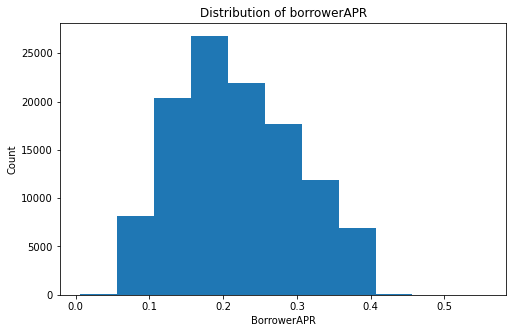

In [3]:
bins = np.arange(new_df['BorrowerAPR'].min(), new_df['BorrowerAPR'].max()+0.05, 0.05) 
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('Distribution of borrowerAPR')
plt.show()

## Distribution of Lender Yield Data

> The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee. It is observed from the histogram graph that the lender yield between 0.3 and 0.31 had the highest count.

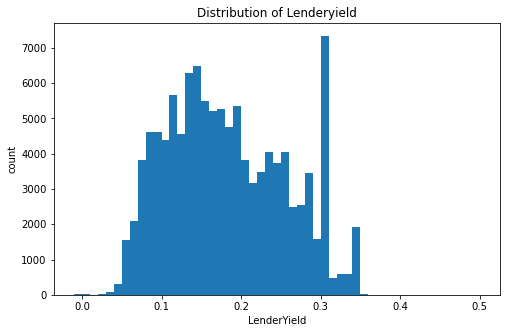

In [4]:
bins = np.arange(new_df['LenderYield'].min(), new_df['LenderYield'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'LenderYield', bins = bins)
plt.xlabel('LenderYield')
plt.ylabel('count')
plt.title('Distribution of Lenderyield')
plt.show()

## Distribution of Prosper Rating (Numeric) Data

> This is the Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

> From the histogram below, the prosper rating with the highest count is 4.0 and the lowest is 7.0.

Text(0.5, 1.0, 'Distribution of ProsperRating (Numeric)')

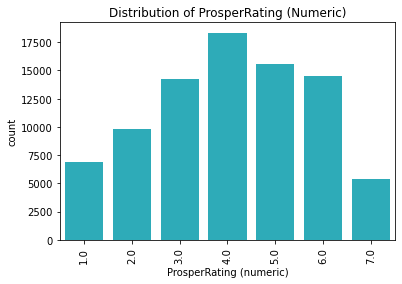

In [5]:
favcolor = sb.color_palette()[-1]
sb.countplot(data = new_df , x = 'ProsperRating (numeric)', color = favcolor)
plt.xticks(rotation = 90)
plt.title('Distribution of ProsperRating (Numeric)')

## Bivariate: Relationship between Borrower's APR and Lender's Yield

> I plotted a scatterplot to show the relationship between Borrower's APR and Lender's Yield. It was observed that there is a positive relationship between the borrower's APR and the lender's Yield. Hence the higher the lender yield, the higher the borrower's APR.


Text(0.5, 1.0, 'BorrowerAPR vs Lenderyield')

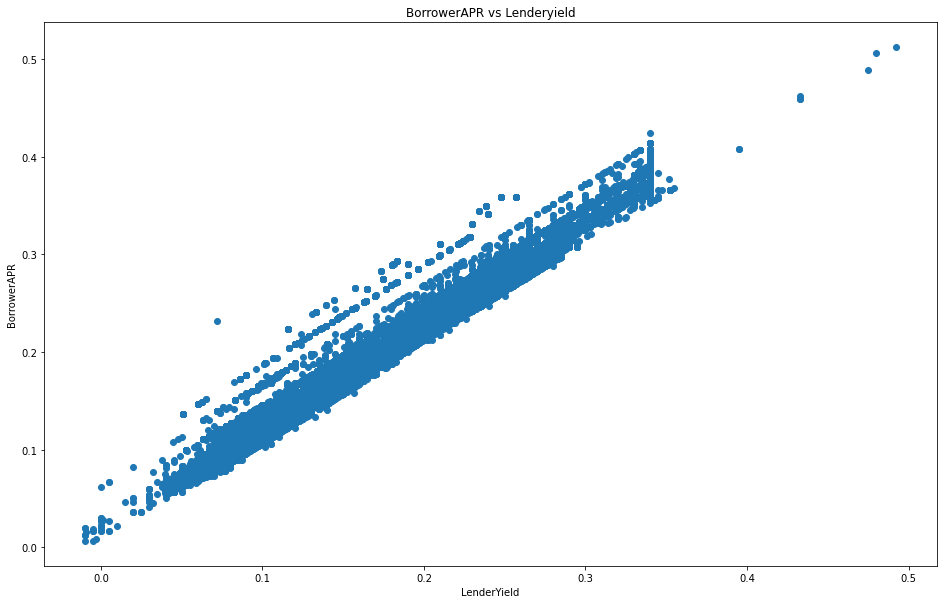

In [6]:
plt.figure(figsize = [16, 10])
plt.scatter(data = new_df, x = 'LenderYield', y = 'BorrowerAPR');
plt.ylabel('BorrowerAPR')
plt.xlabel('LenderYield')
plt.title('BorrowerAPR vs Lenderyield')

## Multivariate: Relationship between Borrower's APR, Lender yield and Prosper rating

> I plotted a scatterplot that showed the relationship between borrower's APR and Loanyield per prosper rating. I used a color pallete to represent the prosper scores. It is seen that the lower prosper rating i.e 1 - 5, have higher borrowerAPR and corresponding lender yield compared to the higher prosper ratings

Text(0.5, 1.0, 'Lenderyield vs borrowerAPR for each prosper rating')

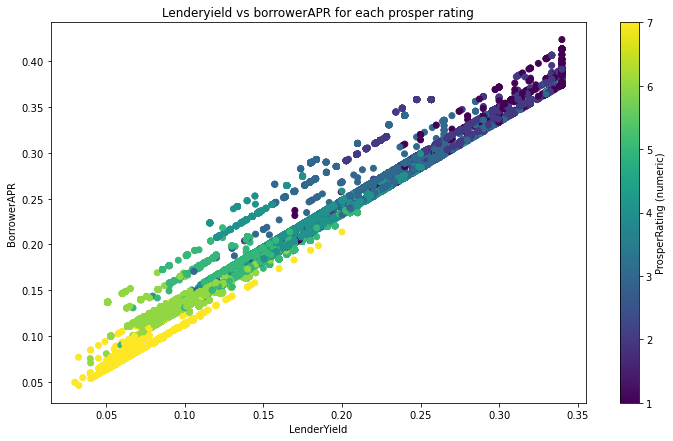

In [7]:
plt.figure(figsize = [12, 7])
plt.scatter(data = new_df, x = 'LenderYield', y = 'BorrowerAPR', c = 'ProsperRating (numeric)');
plt.colorbar(label = 'ProsperRating (numeric)')
plt.ylabel('BorrowerAPR')
plt.xlabel('LenderYield')
plt.title('Lenderyield vs borrowerAPR for each prosper rating')

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan_Exploration.ipynb --to slides --post serve --no-input --no-prompt